### <p style="text-align: right;"> &#9989; Erick Verleye</p>

# Homework Assignment #2 (Group)
## Solving the trajectory of a cannonball
<img src="https://s3-eu-west-1.amazonaws.com/functionsandgraphs/cannonball+trajectory.png" width=400px>

### Goals for this homework assignment
By the end of this assignment, you should be able to:
* Compute solutions to a system a Ordinary Different Equations (ODEs) using the forward Euler method and the midpoint method.
* Describe the difference in accuracy between these two solutions as a function of step size.

### Assignment instructions

Work in your assigned group through the following assignment, making sure to follow all of the directions and answer all of the questions. You only need to submit one notebook per group. You may wish to create a Git repository for keeping track of your work and facilitating collaboration between your group. If you do so, I strongly encourage you to considering writing your code using Python scripts to simplify the version control process. If you write any scripts, you should plan on uploading them to D2L along with this notebook.

**This assignment is due roughly two weeks from now at 11:59pm on Sunday, February 11th.** It should be uploaded into the "Homework Assignments" dropbox folder for Homework #2.  Submission instructions can be found at the end of the notebook.

### Grading

1. Question 1: modeling the trajectory with forward euler (10 points)
2. Question 2: modeling the trajectory with the midpoint method (6 points)
3. Question 3: adding air resistance to the model (6 points)
4. Question 4: comparing solutions (3 points)

Total points: **25**

---
## Modeling a cannonball trajectory using numerical methods

In this assignment, you are going to model a simple system - namely, the launching of a cannonball.  A cannonball's position ($\vec{x}$) and velocity ($\vec{v}$) evolve according to a simple set of rules:

$$\vec{x} = \int_0^t \vec{v} dt$$

$$\vec{v} = \int_0^t \vec{a} dt$$

$$\vec{a} = \frac{1}{m}\frac{d\vec{p}}{dt} = \frac{1}{m}\sum \vec{F}$$

Note that $\vec{a}$ is the acceleration, $\vec{p} = m\vec{v}$ is the momentum, and m is the mass of the cannonball.  In the last term of the third equation, the sum is over all forces acting on the cannonball.  The constants in the definite integrals are set to the values $\vec{x}_0$ and $\vec{v}_0$, i.e., the position and velocity at $t=0$.  Note that these equations can be rewritten as initial-value problems:

$$\frac{d\vec{x}}{dt} = \vec{v}$$

$$\frac{d\vec{v}}{dt} = \vec{a} = \frac{1}{m} \sum \vec{F}$$

With $\vec{x}_0$ and $\vec{v}_0$ given as initial values at $t=0$.

The forces acting on the cannonball are gravity, which acts downward with a magnitude of acceleration of $g=9.81$m s$^{-2}$, and air resistance, which can be written as:

$$F_{air} = -\frac{1}{2} C \rho A v^2 \hat{v}$$

Where C is a constant corresponding to the shape of the object ($C=0.47$ for a sphere), $\rho$ is the density of the atmosphere, 1.2 kg/m$^3$, A is the cross-sectional area of the object, $v$ is the magnitude of the velocity, and $\hat{v}$ is the unit vector of the velocity, which indicates that the force of the air drag is along the direction of motion. *Note the minus sign* - this means that the force of air resistance always opposes the motion of the cannonball, regardless of its direction.

When tracking the motion of the cannonball, you should break the system up so that you track the following four quantities:

* $x$, the position in the $x$-direction
* $y$, the position in the $y$-direction
* $v_x$, the velocity in the $x$-direction
* $v_y$, the position in the $y$-direction

You can start the cannonball at the origin, (0,0), and define your initial values for velocities to be:

* $v_{x,0} = v_0\cos(\theta)$
* $v_{x,0} = v_0\sin(\theta)$

where $v_0$ is the initial magnitude of the velocity.

**Note**: While you might not necessarily have a background in physics, the important parts of this assignment do not require such a background. The goal of the assignment is to implement a numerical solution to the system of ODEs, so if you're having trouble figuring out what the system of equations is, make sure to stop by office hours or help room hours! 

### Solutions to a system of ODEs

Recall that when you have a variable, $x$, that evolves as a function of time, $\frac{dx}{dt} = f(t,x)$, you can use the **forward Euler method** to step the solution forward in time in the following way:

$$x(t+\Delta t) = x(t) + \Delta t\frac{dx}{dt} = x(t) + \Delta t~f(t,x)$$

We can simplify the notation by defining $x_n = x(t_n)$ and $x_{n+1} = x(t+\Delta t) = x(t_{n+1})$ so that the above equation becomes:

$$x_{n+1} = x_n + \Delta t~f(t_n,x_n)$$

You can read more about this method [here](https://en.wikipedia.org/wiki/Euler_method).

If we want to evolve that variable using the **midpoint method** (also sometimes called the second order Runge-Kutta method), then we can compute the evolution of the system this way

$$x_{n+1} = x_n + \Delta t~f\big(t_n + \frac{\Delta t}{2}, x_n + \frac{\Delta t}{2}f(t_n, x_n)\big)$$

Essentially, with the midpoint method, we take a half step and then use the information at that half step to take our full step. We can write this in a slightly simpler way by doing a bit of new variable definition:

$$k_1 = \Delta t~f(t_n,x_n)$$
$$k_2 = \Delta t~f\big(t_n + \frac{\Delta t}{2}, x_n + \frac{k_1}{2}\big)$$
$$x_{n+1} = x_n + k_2$$

You can read more about this method [here](https://en.wikipedia.org/wiki/Midpoint_method).

---
### Question 1

Consider a spherical cannonball made of lead, which has a radius of 10 cm and a density of 11.34 g $cm^{-3}$, and is launched in the air with a velocity of 100 m/s at an angle of $40^\circ$ with respect to the horizontal on a level surface.  <i>In the absence of air resistance</i>, **use the forward Euler method** to determine where the cannonball lands. You can treating "landing" as the moment when the height of the cannonball first becomes negative.  Compare this to the distance obtained using the range equation:

$$d = \frac{v_0^2 \sin 2 \theta}{g}$$

Assuming you want your calculated distance to be within 1% of the true value, **how many steps are required by your forward Euler solution to reach this level of accuracy?**

You can define a measurement of the error in the following way:

$$E = \frac{\big|d_{\mathrm{true}} - d_{\mathrm{calculated}}\big|}{d_{\mathrm{true}}}$$

**Include a plot the trajectory of the cannonball and print the number of steps it your solultion took and the amount of error in the solution.**

1014.85567824


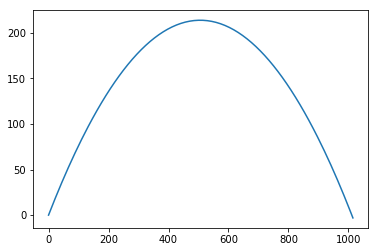

In [232]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
C=0.47
M=475 #kg
A=np.pi*(.1**2)
th0=40
p=1.2
v0=100
vx0=v0*np.cos(np.deg2rad(th0))
vy0=v0*np.sin(np.deg2rad(th0))
ax0=0
ay0=-9.81
x0=0
y0=0


axl=[ax0]
ayl=[ay0]
vxl=[vx0]
vyl=[vy0]
xl=[0]
yl=[0]
tl=[0]
t=0
dt=.096
while y0 >= 0:
    x_new = x0 + vx0*dt
    y_new = y0 +vy0*dt
    vx_new = vx0 + ax0*dt
    vy_new = vy0 + ay0*dt

    x0 = x_new
    y0 = y_new
    vx0 = vx_new
    vy0 = vy_new

    t += dt
    xl.append(x0)
    yl.append(y0)
    vxl.append(vx0)
    vyl.append(vy0)
    axl.append(ax0)
    ayl.append(ay0)
    tl.append(t)

plt.plot(xl,yl)
yl.index(max(yl))
print(max(xl))


In [233]:
d = v0**2*np.sin(np.deg2rad(80))/9.8
print(d)

1004.90587042


In [234]:
error = (abs(d-max(xl))/(d))*100
print(error, 'Percent Error')

0.990123365409 Percent Error


In [237]:
print("Number of iterations is", len(xl))

Number of iterations is 139


---
### Question 2

Repeat the above calcuation, but this time **use the midpoint method (2nd order Runge-Kutta; RK2)**.

Again, how many steps are required by your midpoint method solution to reach 1% accuracy?

**Include a plot the trajectory of the cannonball and print the number of steps it your solultion took and the amount of error in the solution.**

1011.17866492


[0,
 30.641777724759123,
 61.283555449518246,
 91.92533317427737,
 122.56711089903649,
 153.20888862379562,
 183.85066634855474,
 214.49244407331386,
 245.13422179807299,
 275.77599952283208,
 306.41777724759118,
 337.05955497235027,
 367.70133269710936,
 398.34311042186846,
 428.98488814662755,
 459.62666587138665,
 490.26844359614574,
 520.91022132090484,
 551.55199904566393,
 582.19377677042303,
 612.83555449518212,
 643.47733221994122,
 674.11910994470031,
 704.76088766945941,
 735.4026653942185,
 766.0444431189776,
 796.68622084373669,
 827.32799856849579,
 857.96977629325488,
 888.61155401801398,
 919.25333174277307,
 949.89510946753217,
 980.53688719229126,
 1011.1786649170504]

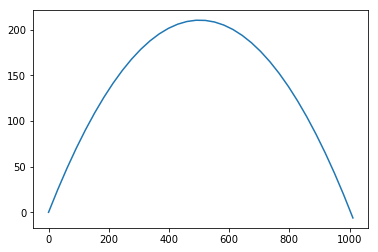

In [271]:
C=0.47
M=475 #kg
A=np.pi*(.1**2)
th0=40
p=1.2
v0=100
vx0=v0*np.cos(np.deg2rad(th0))
vy0=v0*np.sin(np.deg2rad(th0))
ax0=0
ay0=-9.81
x0=0
y0=0


axlm=[ax0]
aylm=[ay0]
vxlm=[vx0]
vylm=[vy0]
xlm=[0]
ylm=[0]
tlm=[0]
t=0
dt=.4
while y0 >= 0:
        x_new = x0 + dt*(vx0 +(dt/2)*ax0)
        y_new = y0 + dt*(vy0 +(dt/2)*ay0)
        vx_new = vx0 + dt*(ax0) 
        vy_new = vy0 + dt*((ay0))

        x0 = x_new
        y0 = y_new
        vx0 = vx_new
        vy0 = vy_new

        t += dt
        xlm.append(x0)
        ylm.append(y0)
        vxlm.append(vx0)
        vylm.append(vy0)
        axlm.append(ax0)
        aylm.append(ay0)
        tlm.append(t)

plt.plot(xlm,ylm)
ylm.index(max(ylm))
print(max(xlm))
xlm

In [267]:
error = (abs(d-max(xlm))/(d))*100
print(error, 'Percent Error')

0.624217121331 Percent Error


In [269]:
print("Number of iterations is", len(xlm))

Number of iterations is 34


---
### Question 3

Now you're going to implement air resistance in your models. Using the information provided above, recompute your landing distances using both methods.

Since you no longer have an equation for the true distance when the effects of air resistance are included, you should test the accuracy of your solution by keeping track of how much your answer changes as you change the step size. You should decrease the step size until your answer changes by less than 1%.

**Include a plot of the trajectory of your solution for both the forward Euler method and the midpoint method. Print the number of steps required by each method. Does the behavior of the cannonball path when air resistance is include seem to make sense?**

998.802678543


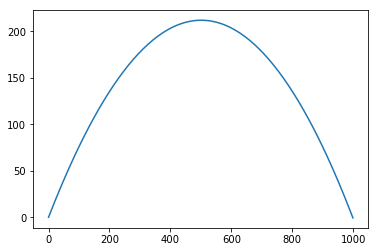

In [272]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
C=0.47
M=475 #kg
A=np.pi*(.1**2)
th0=40
p=1.2
v0=100
vx0=v0*np.cos(np.deg2rad(th0))
vy0=v0*np.sin(np.deg2rad(th0))
ax0=(-1/2)*C*p*A*(vx0**2)/M
ay0=-9.81 + ((-1/2)*C*p*A*(vy0**2)*(vy0/abs(vy0))/M)
x0=0
y0=0


axl=[ax0]
ayl=[ay0]
vxl=[vx0]
vyl=[vy0]
xl1=[0]
yl1=[0]
tl1=[0]
t=0
dt=.07
while y0 >= 0:
    x_new = x0 + vx0*dt
    y_new = y0 +vy0*dt
    vx_new = vx0 + ax0*dt
    vy_new = vy0 + ay0*dt
    ax_new = ((-1/2)*C*p*A*(vx_new**2)*(vx_new/abs(vx_new))/M)
    ay_new = -9.81 + ((-1/2)*C*p*A*(vy_new**2)*(vy_new/abs(vy_new))/M)
    x0 = x_new
    y0 = y_new
    vx0 = vx_new
    vy0 = vy_new
    ax0 = ax_new
    ay0 = ay_new
    t += dt
    xl1.append(x0)
    yl1.append(y0)
    vxl.append(vx0)
    vyl.append(vy0)
    axl.append(ax0)
    ayl.append(ay0)
    tl1.append(t)

plt.plot(xl1,yl1)
yl1.index(max(yl1))
print(max(xl1))


In [274]:
print("Number of iterations is", len(xl1))

Number of iterations is 189


993.493214396


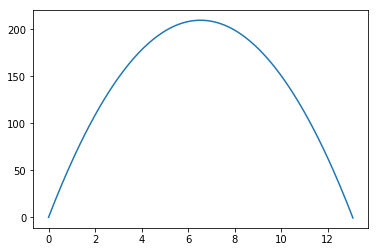

In [283]:
C=0.47
M=475 #kg
A=np.pi*(.1**2)
th0=40
p=1.2
v0=100
vx0=v0*np.cos(np.deg2rad(th0))
vy0=v0*np.sin(np.deg2rad(th0))
ax0=(-1/2)*C*p*A*(vx0**2)/M
ay0=-9.81 + ((-1/2)*C*p*A*(vy0**2)*(vy0/abs(vy0))/M)
x0=0
y0=0


axlm=[ax0]
aylm=[ay0]
vxlm=[vx0]
vylm=[vy0]
xlm1=[0]
ylm1=[0]
tlm1=[0]
t=0
dt=.07
while y0 >=0:
    x_new = x0 + dt*(vx0 +(dt/2)*ax0)
    y_new = y0 + dt*(vy0 +(dt/2)*ay0)
    vx_new = vx0 + dt*(ax0 -dt*(C*p*A*(2*vx0*ax0)*(vx0/abs(vx0))/M))
    vy_new = vy0 + dt*(ay0 -dt*(C*p*A*(2*vy0*ay0)*(vy0/abs(vy0))/M))
    ax_new = ((-1/2)*C*p*A*(vx_new**2)*(vx_new/abs(vx_new))/M)
    ay_new = -9.81 + ((-1/2)*C*p*A*(vy_new**2)*(vy_new/abs(vy_new))/M)
    x0 = x_new
    y0 = y_new
    vx0 = vx_new
    vy0 = vy_new
    ax0 = ax_new
    ay0 = ay_new
    t += dt
    xlm1.append(x0)
    ylm1.append(y0)
    vxlm.append(vx0)
    vylm.append(vy0)
    axlm.append(ax0)
    aylm.append(ay0)
    tlm1.append(t)

plt.plot(tlm1,ylm1)

print(max(xlm1))

In [282]:
print("Number of iterations is", len(xlm1))

Number of iterations is 188


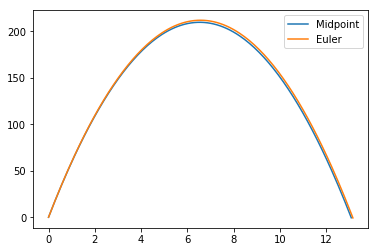

In [284]:
plt.plot(tlm1,ylm1, label='Midpoint')
plt.plot(tl1,yl1, label = 'Euler')
plt.legend()

---
### Question 4

Once you have a functional solution that includes air resistance for both numerical methods, make one last plot where you take the best step size from your midpoint method solution and recompute the solution for both methods using the **same step size**. Then, **make a plot that includes the trajectories for both solutions** to compare how the solution from the less accurate forward Euler method compares to the solution from the midpoint method when air resistance is included.

**Does the forward Euler method underestimate or overestimate the effects of air resistance?**

---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [191]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://goo.gl/forms/rRqbVfls0YDFTONb2" 
	width="80%" 
	height="1200px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

### Congratulations, you're done!

Submit this assignment by uploading it to the course Desire2Learn web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework #2, and upload it there. If you wrote your code in a script, upload a copy of the script(s) as well. 